# Retrieving Userbase 1 Dataset

In [55]:
import pandas as pd

# Reading the dataset
userbase1_dataframe = pd.read_csv("dataset/ml-100k/u1.base", names=['user id', 'item id', 'rating', 'timestamp'], delimiter="\t")

# Dropping Timestamp because we're not using it
userbase1_dataframe.drop(['timestamp'], axis=1, inplace=True)

userbase1_dataframe

,user id,item id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
79995,943,1067,2
79996,943,1074,4
79997,943,1188,3
79998,943,1228,3


# Getting a sample of users and movies

In [56]:
items = [1, 2, 3, 4, 5, 7, 8, 9, 10]

filtered_df = userbase1_dataframe[userbase1_dataframe['item id'].isin(items)]

filtered_df

,user id,item id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
79627,940,9,3
79731,941,1,5
79732,941,7,4
79832,943,2,5


In [57]:
users = filtered_df['user id'].value_counts().head(10)
users = users.index.tolist()
users

[1, 886, 435, 561, 406, 682, 393, 864, 303, 916]

In [58]:
filtered_df = filtered_df[filtered_df['user id'].isin(users)]
filtered_df

,user id,item id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
77181,916,3,3
77182,916,4,4
77183,916,5,3
77184,916,7,4


# Defining Items Ids by Movie Name

In [67]:
import pandas as pd

# Read the CSV file into a DataFrame
movie_dataframe = pd.read_csv("dataset/ml-100k/u.item", names=['movie id', 'movie title', 'other', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], delimiter="|", encoding='latin1')

# Selecting the first two columns
movie_dataframe = movie_dataframe.iloc[:, :2]

movie_dataframe

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [69]:
# Filter the DataFrame to get the desired movies
desired_movies = movie_dataframe[movie_dataframe['movie id'].isin(items)]

# Get the list of movie titles
movie_titles = desired_movies['movie title'].tolist()
movie_titles

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Twelve Monkeys (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'Richard III (1995)']

# Plotting Utility Matrix

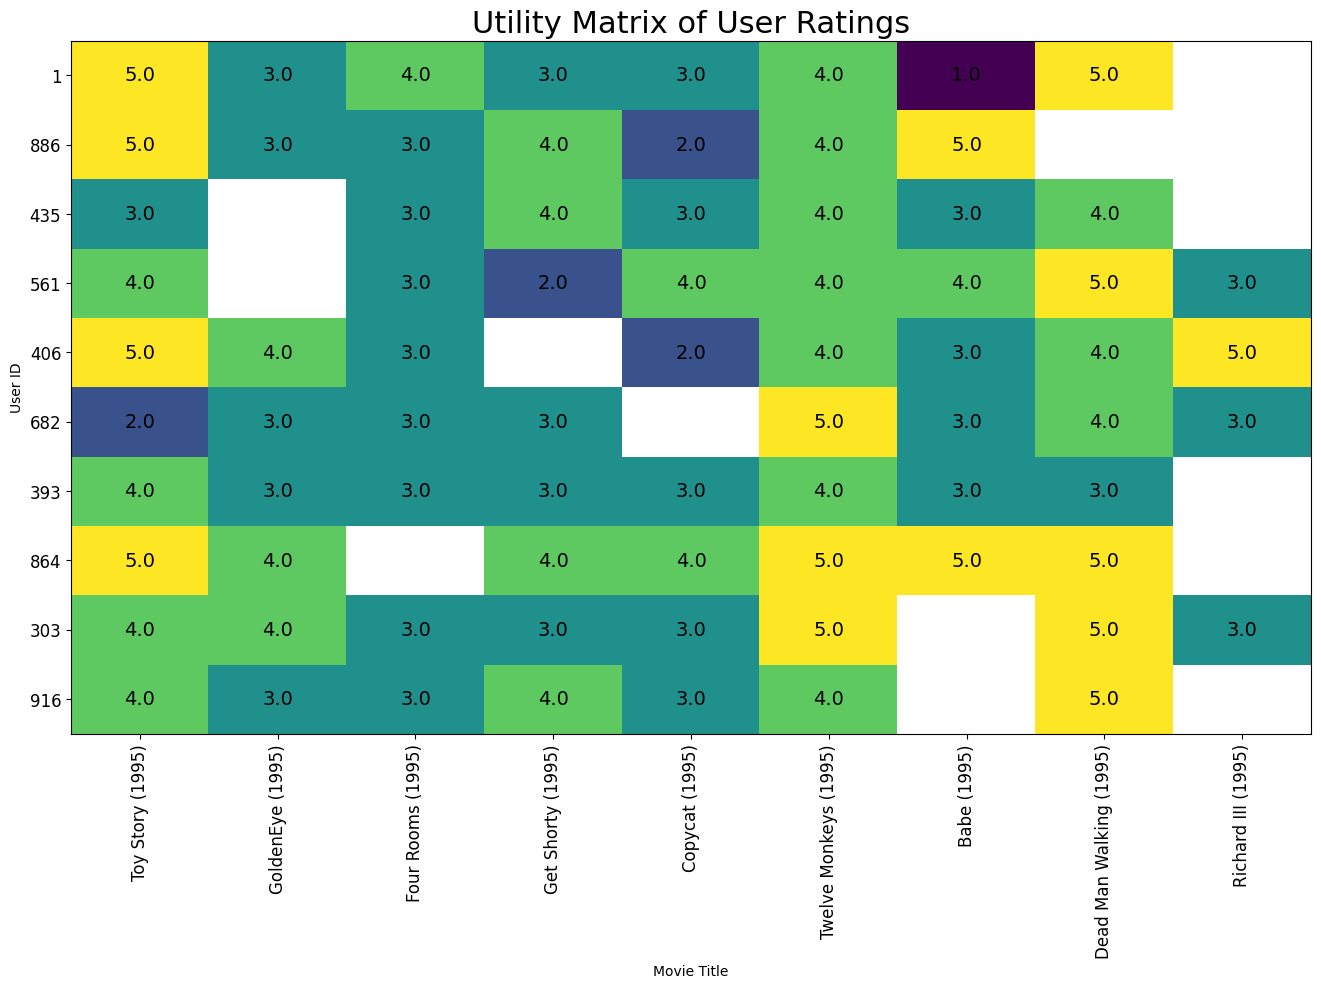

In [88]:
import matplotlib.pyplot as plt


# Creating a pivot table for visualization
pivot_table = filtered_df.pivot(index='user id', columns='item id', values='rating')

# Plotting
plt.figure(figsize=(16, 9))
plt.imshow(pivot_table, cmap='viridis', aspect='auto', interpolation='nearest')

plt.xlabel('Movie Title')
plt.ylabel('User ID')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], labels=movie_titles, rotation=90, fontsize=12)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=users, fontsize=12)

# Adding labels on the plot
for i in range(len(users)):
    for j in range(len(movie_titles)):
        if str(pivot_table.iloc[i, j]) != 'nan':
            plt.text(j, i, str(pivot_table.iloc[i, j]), ha='center', va='center', color='black', fontsize=14)


plt.title('Utility Matrix of User Ratings', fontsize=22)
plt.show()